**Importing all libraries**

In [31]:
import pandas as pd
# import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix

**Dataset Preparation**

* Loading Dataset to Pandas Dataframe



In [32]:
dataset = pd.read_csv('/content/drive/MyDrive/Postman Recruitments/Task 1/WineQT.csv')

* Inspect First 5 Rows

In [33]:
dataset.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Id
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,1
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,2
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,3
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,4


* Check for Missing Data

In [34]:
dataset.isnull().sum()

,0
fixed acidity,0
volatile acidity,0
citric acid,0
residual sugar,0
chlorides,0
free sulfur dioxide,0
total sulfur dioxide,0
density,0
pH,0
sulphates,0


**Exploratory Data Analysis**



*   Summary Statistics



In [35]:
dataset.describe() # This gives all the summary statistics of the features including min, max, percentiles, count...

dataset.describe().loc[['mean', '50%', 'std']] # Selecting only mean, median and standard deviation

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Id
mean,8.311111,0.531339,0.268364,2.532152,0.086933,15.615486,45.914698,0.996730,3.311015,0.657708,10.442111,5.657043,804.969379
50%,7.900000,0.520000,0.250000,2.200000,0.079000,13.000000,37.000000,0.996680,3.310000,0.620000,10.200000,6.000000,794.000000
std,1.747595,0.179633,0.196686,1.355917,0.047267,10.250486,32.782130,0.001925,0.156664,0.170399,1.082196,0.805824,463.997116


* Visualizations



1.   Histograms

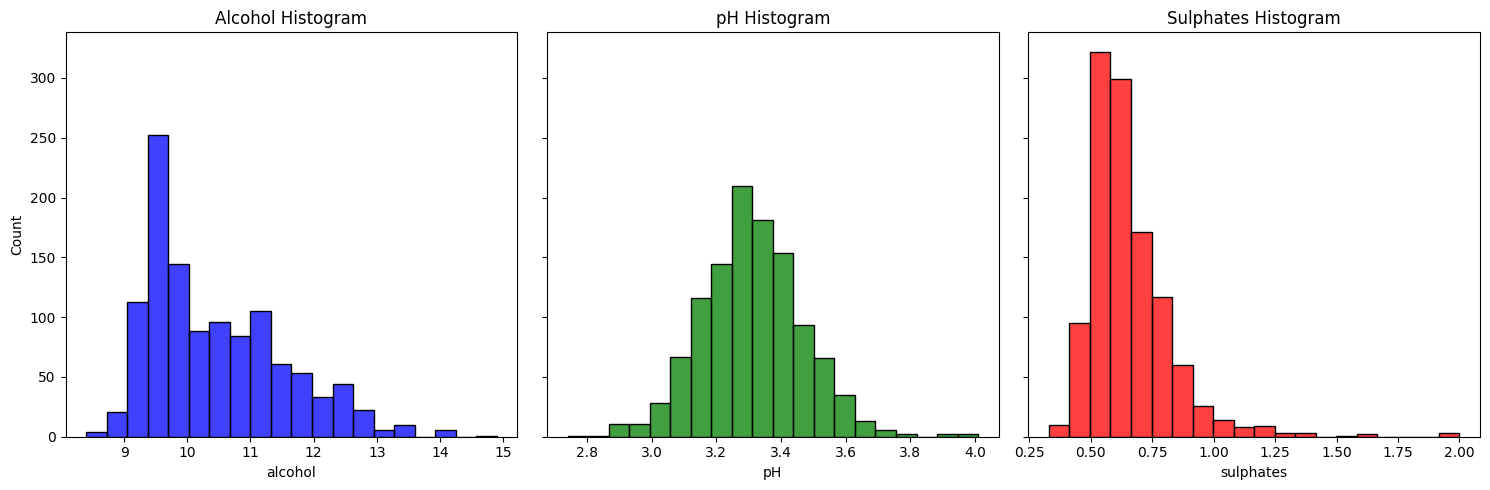

In [36]:
fig, axs = plt.subplots(1, 3, figsize=(15, 5), sharey=True) # plt.subplots returns an obj fig and axes

sns.histplot(dataset['alcohol'], bins=20, color='blue', ax=axs[0])
axs[0].set_title('Alcohol Histogram')

sns.histplot(dataset['pH'], bins=20, color='green', ax=axs[1])
axs[1].set_title('pH Histogram')

sns.histplot(dataset['sulphates'], bins=20, color='red', ax=axs[2])
axs[2].set_title('Sulphates Histogram')

plt.tight_layout()
plt.show()

2. Correlation Heatmap

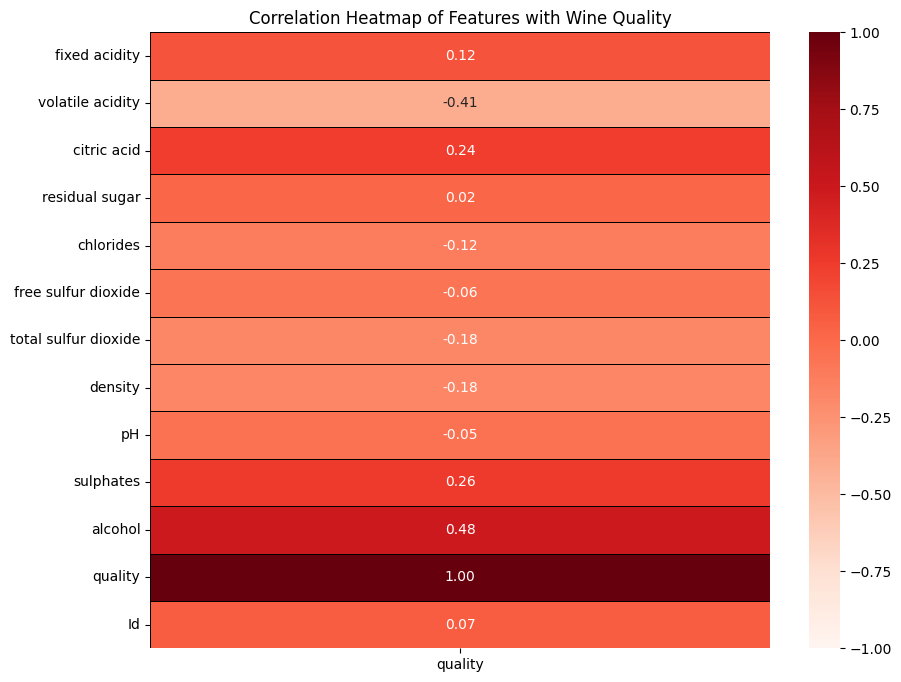

In [37]:
# correlation_matrix = dataset.corr()
# quality_correlation = correlation_matrix[['quality']]

plt.figure(figsize=(10, 8))
sns.heatmap(dataset.corr()[['quality']],
            annot=True,       # Show correlation values
            cmap='Reds',  # Color map
            fmt='.2f',        # Format for annotations
            vmin=-1, vmax=1,  # Set limits for color scaling
            linewidths=0.5,  # Line width
            linecolor='black')  # Line color

plt.title('Correlation Heatmap of Features with Wine Quality')

plt.show()


**Binning Quality Scores**

In [38]:
binary_dataset = dataset['quality'].apply(lambda x: 1 if x >= 7 else 0) # 1 = "Good", 0 = "Not good".
binary_dataset

,quality
0,0
1,0
2,0
3,0
4,0
...,...
1138,0
1139,0
1140,0
1141,0




**Splitting Dataset**


In [39]:
# Splitting dataset in x and y containing features and binary quality resp.
x = dataset.drop('quality', axis=1)
y = binary_dataset

# Splitting datasets into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)

**Machine Learning Model 1 ( Decision Tree Classifier )**



*   Initializing and training the model


In [40]:
model = DecisionTreeClassifier()

model.fit(x_train, y_train)

DecisionTreeClassifier()

* Evaluating the model

In [41]:
# Predicting values of test data
y_pred = model.predict(x_test)

# Accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy * 100} %')

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print('Confusion Matrix:')
print(conf_matrix)

Accuracy: 86.8995633187773 %
Confusion Matrix:
[[185  15]
 [ 15  14]]


**Machine Learning Model 2 ( Random Forest Classifier )**

*   Initializing and training the model


In [42]:
model = RandomForestClassifier(n_estimators=100) # n_estimators is the number of trees in the forest

model.fit(x_train, y_train)

RandomForestClassifier()

* Evaluating the model

In [43]:
y_pred = model.predict(x_test)

# Accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy * 100} %')

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print('Confusion Matrix:')
print(conf_matrix)

Accuracy: 89.95633187772926 %
Confusion Matrix:
[[192   8]
 [ 15  14]]


Statistically, Random Forest Classifier has a better performance compared to Decision Tree Classifier

**Model Tuning**

* Using GridSearchCV to tune the hyperparameters

In [44]:
param_grid = {
    'n_estimators': [50, 100, 200], # Number of trees
    'max_depth': [10, 15, 20, 30, None], # Max depth of each tree
    'min_samples_split': [2, 5, 10] # Min no. of samples required to split an internal node
}

model = RandomForestClassifier(random_state=42)

grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, scoring='accuracy')

grid_search.fit(x_train, y_train)

print(f"Best Hyperparameters: {grid_search.best_params_} ")
print(f"Best Cross-Validation Accuracy: {grid_search.best_score_ * 100} %")


Best Hyperparameters: {'max_depth': 10, 'min_samples_split': 2, 'n_estimators': 200} 
Best Cross-Validation Accuracy: 91.3565123401189 %


* Using k-fold cross-validation to assess model robustness

In [45]:
cv_scores = cross_val_score(DecisionTreeClassifier(random_state=42), x, y, cv=5)
print(f"Cross-Validation Scores: {cv_scores}")
print(f"Mean CV Accuracy: {cv_scores.mean() * 100} %")


Cross-Validation Scores: [0.87772926 0.75982533 0.86899563 0.83333333 0.86403509]
Mean CV Accuracy: 84.07837278786486 %
